#### 확률적 경사하강법 SGD
```
모델의 오차(비용)를 최소하는 파라메터(가중치)를 찾기위한 최적화 방법
현재위치 : 모델의 현재 파라메터
산의 높이 : 모델의 오차
기울기 : 반대방향으로 가야 가장 빠르게 낮아진다
```
```
배치경사 하강법 : 산 전체의 지형을 모두 조사해서 가장 가파른 방향을 찾아 한걸음씩 내려가는 구조
(한번에 전체 데이터를 다 쓴다)
장점 : 기울기 계산이 매우 정확
단점 : 데이터가 많으면 매우 느리고 리소스를 많이 사용

확률적 경사하강법 : 무작위로 한 지점만 보고 그곳의 경사를 따라서 내려간다
SGD는 무작위로 샘플 한개의 오차를 계산하고 파라메터를 업데이트 이 과정을 모든 데이터에  대해서
빠르게 반복
무작위성의 장점 : 지역최저점(local minimum)에 갇히지 않고 더 낮은 전역 최저점(global minimum)

```

```
Wnew : 새로운 가중치
Wold : 현재 가중치
n(에타) : 학습률 learning rate 너무 크면 최적점을 지나고 너무 작으면 학습이 매우 느려진다
나블라 : 기울기 Gradient
j : 오차함수(배용함수) 현재 가중치 Wold에서 하나의 데이터샘플에 대한 오차

새로운  가중치 = 현재 가중치 오차를 키우는 기울기 방향과 반대로 학습률 만큼 이동한 값
```

In [1]:
# y = Wx
# 비용함수 오차 (Wx - y)^2 / 2수식을 미분 (Wx - y)*x
# 공부시간 x 시험점수 y
# (3, 7) w-old = 1.0 학습률 n = 0.1
# y-pred = 1.0 * 3
# 기울기 계산 = (3 - 7) * 3 = -12
# w-new = 1.0 - 0.1 * -12 = 2.2

# (5,10)
# y-pred = 2.2 * 5
# 기울기 계산 = (11 - 10) * 5 = 5
# w-new = 2.2 - 0.1 * 5 = 1.7


Epoch 1/100, Loss: 0.8243 w: 2.0211, b: 1.0492
Epoch 11/100, Loss: 0.8239 w: 2.0770, b: 1.1041
Epoch 21/100, Loss: 0.8232 w: 2.0790, b: 1.0940
Epoch 31/100, Loss: 0.8216 w: 2.0001, b: 1.1147
Epoch 41/100, Loss: 0.8216 w: 2.0252, b: 1.0770
Epoch 51/100, Loss: 0.8212 w: 2.0713, b: 1.0600
Epoch 61/100, Loss: 0.8334 w: 2.0098, b: 1.0061
Epoch 71/100, Loss: 0.8210 w: 2.0530, b: 1.0823
Epoch 81/100, Loss: 0.8259 w: 2.0449, b: 1.0128
Epoch 91/100, Loss: 0.8317 w: 2.0704, b: 0.9574


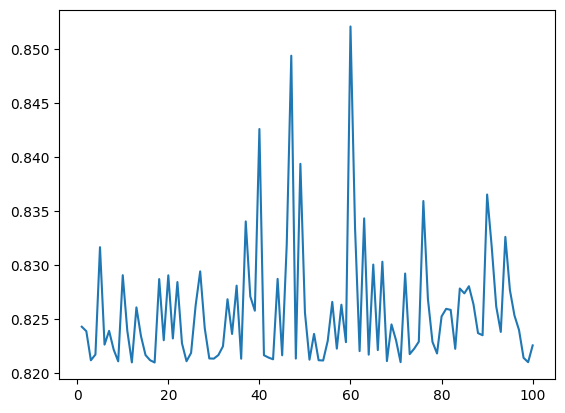

In [11]:
# learning rate 학습률 - 기울기의 방향으로 다음 가중치 업데이트 양
# epoch # 몇번 학습
import numpy as np
import matplotlib.pyplot as plt
# 샘플데이터 y = 2x + 1
x = 2 * np.random.rand(100,1)
y = 2 * x + np.random.randn(100,1) + 1 # 약간의 잡음추가

# SGD를 위한 초기값 셋팅
w = np.random.randn(1,1) # 가중치
b = np.random.randn(1,1) # y 절편
learning_rate = 0.005
n_epochs = 100
history = [] # 학습현황 기록
loss = []
# 학습반복
for epoch in range(n_epochs):
    # epoch 마다 전체 데이터셋을 한번씩 학습
    for i in range(len(x)):
        random_idx = np.random.randint(len(x)) # 0~99 사이의 임의의 정수
        xi = x[random_idx:random_idx+1]
        yi = y[random_idx:random_idx+1]
        # 예측 y-pred = Wx + b
        y_pred = xi.dot(w) + b

        # 오차 계산
        error = y_pred - yi
        
        # 수식적용 : 기울기 계산
        gradient_w =  xi.T.dot(error) # (Wx - y)*x
        gradient_b = np.sum(error) # (Wx - y)*1

        # 수식적용 가중치와 편향 업데이트
        w = w - learning_rate * gradient_w
        b = b - learning_rate * gradient_b
        history.append((w.copy()[0,0], b.copy()[0,0])) # 시각화를 위해서 저장

    # epoch 마다 상태 출력
    total_loss = np.mean((x.dot(w) + b - y)**2)
    loss.append(total_loss)
    if epoch % 10 == 0:
        print(f"Epoch {epoch+1}/{n_epochs}, Loss: {total_loss:.4f} w: {w[0,0]:.4f}, b: {b[0,0]:.4f}")

plt.plot(range(1,n_epochs+1), loss)

In [16]:
# SGD
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd.fit(x,y)

c:\Users\31799\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [18]:
sgd.predict(x)[:5], y[:5]

(array([4.80602368, 3.96357924, 3.51402201, 1.57213391, 2.17977518]),
 array([[4.81498907],
        [2.62129754],
        [3.66891425],
        [0.63682685],
        [1.51381991]]))

In [20]:
w,b
predict = w * x + b
predict[:5], y[:5], sgd.intercept_, sgd.coef_

(array([[5.04380814],
        [4.08767466],
        [3.57744906],
        [1.37350049],
        [2.06314378]]),
 array([[4.81498907],
        [2.62129754],
        [3.66891425],
        [0.63682685],
        [1.51381991]]),
 array([1.31580026]),
 array([1.83373083]))